[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# **LABORATORIO 6 DE SIS420 - APRENDIZAJE NO SUPERVISADO**

### Nombre de integrantes del Grupo:
   ### - Segura Ibarra Cristhian   Ing. Sistemas
   ### - Yavo Chavez Abigail Zulma  Ing. Diseño
   ### - Gonzales Suyo Franz Reinaldo  Ing. Sistemas

# Implementación del modelo Aprendizaje No Supervisado

En este ejercicio implementaremos el modeo con el Dataset.

Nuestro objetuvo aplicar el modelo de aprendizaje no supervisado con imagenes que tinen etiquetas de 28x28 pixeles y 61 Labels.
En el siguiente dataset **English Typed Alphabets and Numbers Dataset in CSV** `typedCSV.csv` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/munemshahriar642/english-typed-font-in-csv

Link del Repositorio de GitHub LAB-06: https://github.com/CSeguraIbarra/IA-SIS420/tree/e7dbb907db0993b9882a26bedb37e6923938256b/laboratorio06

# **Información del Dataset** 


## Acerca del conjunto de datos

### Descripción del conjunto de datos: Conjunto de datos de caracteres ingleses con tipo (A-Z, A-Z, 0-9)

### Introducción:

Este conjunto de datos contiene una colección de caracteres en inglés escritos representados como imágenes en escala de grises de 28x28, convertidos a matrices 1D y guardados en formato CSV. El conjunto de datos consta de caracteres del 0 al 9, letras mayúsculas de la A a la Z y letras minúsculas de la A a la Z, con un total de 62 etiquetas distintas. Cada etiqueta corresponde a un carácter o número específico en inglés. El conjunto de datos se generó a partir de archivos JPG que contenían caracteres ingleses escritos, se cambió el tamaño a 28x28 y se convirtió en matrices numpy antes de guardarse como un archivo CSV.

### Detalles del conjunto de datos:

Formato de archivo: CSV (valores separados por comas)

Número total de imágenes: 62 * 1016 = 62.992

Dimensiones de la imagen: 28x28 píxeles (784 píxeles por imagen representada como una matriz 1D)

Etiquetas: 0-9 (correspondiente a los números ingleses 0 a 9), 10-35 (correspondiente a A-Z), 36-61 (correspondiente a a-z).


### Información de la etiqueta:

Etiquetas del 0 al 9: representan los números ingleses del 0 al 9.

Etiquetas 10 a 35: representan las letras mayúsculas en inglés de la A a la Z.

Etiquetas 36 a 61: representan las letras minúsculas inglesas de la a a la z.

### Proceso de transformación de datos:

Colección de imágenes: El conjunto de datos original consistía en caracteres ingleses escritos almacenados como archivos JPG.

Cambio de tamaño: Se cambió el tamaño de cada imagen a un tamaño uniforme de 28x28 píxeles para garantizar la coherencia.

Conversión en escala de grises: Las imágenes se convirtieron a escala de grises, lo que dio como resultado imágenes de un solo canal.

Representación de matriz: Cada imagen en escala de grises se transformó en una matriz 1D de 784 elementos, y cada elemento representa el valor de intensidad de un píxel (que va de 0 a 255).

Conversión CSV: Las matrices 1D de todas las imágenes se guardaron en un archivo CSV con 784 columnas (píxel 0 a píxel 783) y sus etiquetas correspondientes (0-61) en columnas separadas.


### Distribución de etiquetas:
El conjunto de datos está equilibrado y cada etiqueta contiene exactamente 1016 imágenes. Esta distribución equilibrada garantiza que cada carácter tenga una representación igual en el conjunto de datos, lo que evita el sesgo durante el entrenamiento y la evaluación.

### Uso:
este conjunto de datos se puede utilizar para diversas tareas de aprendizaje automático, como la clasificación de imágenes, el reconocimiento de caracteres y los proyectos de aprendizaje profundo. Los investigadores y desarrolladores pueden emplear este conjunto de datos para entrenar y evaluar modelos que reconozcan caracteres, números y letras en inglés escritos.

Tenga en cuenta que este conjunto de datos se proporciona únicamente con fines educativos y de investigación, y se debe dar el crédito adecuado a los creadores del conjunto de datos cuando se utilice en cualquier publicación o aplicación.

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

El clustering es una técnica en el aprendizaje no supervisado que consiste en agrupar un conjunto de datos en grupos o clústeres. Cada grupo contiene elementos que son más similares entre sí en comparación con los de otros grupos. El objetivo principal del clustering es encontrar patrones o estructuras subyacentes en los datos sin que haya etiquetas o categorías predefinidas.

### K-Means

K-means es un algoritmo de clustering que agrupa datos en un número predefinido de clústeres, utilizando una medida de distancia para evaluar similitudes entre los puntos. Es un método ampliamente utilizado en el aprendizaje no supervisado debido a su simplicidad y eficiencia.

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [1]:
# Importación de todas las librerias para aplicar el modelo no supervisado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [107]:
# Para generar un conjunto de datos sintéticos para aplicar el algoritmo de K-Means
from sklearn.datasets import make_blobs

# Coordenadas de los centroides de cada cluster en este caso 7 clusters
new_blob_centers = np.array([
    [ 0.5,  2.0],
    [-1.0,  2.5],
    [-2.0,  1.8],
    [-2.5,  0.5],
    [-0.8, -1.0],
    [ 1.0, -1.5],
    [ 2.0, 0.1]
])


# Array de desviación estándar para cada cluster  
new_blob_std = np.array([0.3, 0.25, 0.2, 0.4, 0.3, 0.25, 0.31])


# Generación de los datos sintéticos con 5000 muestras y 7 clústeres
X, y = make_blobs(n_samples=5000, centers=new_blob_centers, cluster_std=new_blob_std, random_state=7)

In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [109]:
print(X.shape)
print(X[:30])
print(y.shape)
print(y[:30])

(5000, 2)
[[ 2.39972543  0.0275606 ]
 [ 1.79704136  0.00731721]
 [ 0.3363983   2.07769719]
 [ 1.18154712 -1.64654918]
 [-2.14807554  0.70799651]
 [ 2.25595515  0.06403043]
 [-2.08465214  2.15967723]
 [ 0.1921377   1.73503178]
 [ 2.22061755  0.24649041]
 [-0.43166651 -0.88976888]
 [-2.00144365  1.3054908 ]
 [ 0.8319207   2.22100688]
 [ 2.24025408  0.59998575]
 [-0.54011981 -1.19182371]
 [-2.13004129  1.73853887]
 [-2.41135614  2.01834869]
 [ 1.94977711  0.18131111]
 [ 0.40297651  2.0463035 ]
 [-2.9902321  -0.01115895]
 [-1.05740369  2.37273363]
 [-0.95098406  2.79688319]
 [ 0.75640053 -1.13326386]
 [-0.68882875 -1.1890772 ]
 [-1.33261259  2.76859607]
 [-1.03696754  2.48387546]
 [ 1.93252725 -0.3849528 ]
 [ 1.94832621 -0.33632886]
 [-3.03067275  0.5323708 ]
 [-2.20830082  1.85379176]
 [-0.81784573 -1.2354211 ]]
(5000,)
[6 6 0 5 3 6 2 0 6 4 2 0 6 4 2 2 6 0 3 1 1 5 4 1 1 6 6 3 2 4]


In [83]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

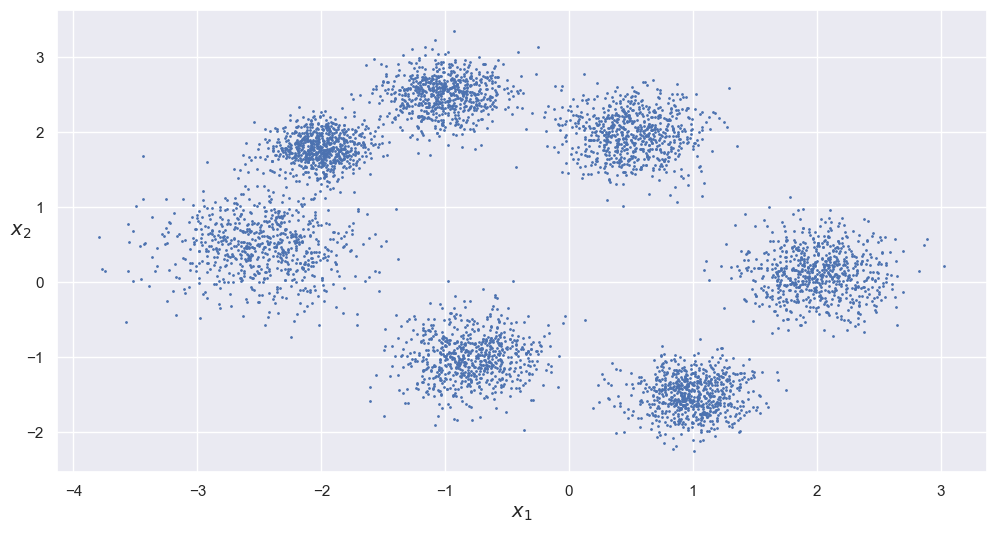

In [108]:
plt.figure(figsize=(12, 6))
# LLamamos a la función
plot_clusters(X)
plt.show()

Este código se utiliza para visualizar un conjunto de datos X en un gráfico de dispersión, donde cada muestra puede estar asociada con una etiqueta (y) que se utiliza para colorear las muestras.

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [110]:
from sklearn.cluster import KMeans

k = 7 # número de clusters

# Crear una instancia del modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Aplicar el algoritmo KMeans para predecir los clusters
y_pred = kmeans.fit_predict(X)

El código utiliza el algoritmo de KMeans para agrupar los datos en k = 7 clusters y luego imprime las etiquetas de cluster asignadas a cada muestra en X. Las etiquetas (y_pred) proporcionan información sobre a qué cluster pertenece cada muestra según el proceso de clustering realizado por KMeans.

In [111]:
# Imprimir las etiquetas de los clusters asignados a cada muestra de X
print(y_pred.shape)
print(y_pred[:100])

(5000,)
[0 0 3 4 1 0 6 3 0 5 6 3 0 5 6 6 0 3 1 2 2 4 5 2 2 0 0 1 6 5 3 1 5 0 6 2 2
 1 1 3 1 4 6 6 2 1 0 6 4 5 6 5 0 2 4 3 3 3 1 4 4 6 6 5 5 3 5 0 3 2 5 6 4 1
 1 4 0 5 6 6 0 0 4 5 6 2 6 0 5 2 5 6 6 6 3 5 1 4 4 1]


In [112]:
# Calculamos las localizaciones de cada uno de centroides de cada clustering
# Accedemos a los centroides finales de los clusters identificados por KMeans
centroids = kmeans.cluster_centers_

print(centroids.shape)
print(centroids)

(7, 2)
[[ 2.00562466  0.12266145]
 [-2.49863311  0.4466925 ]
 [-1.00523493  2.50801745]
 [ 0.50807237  1.9760658 ]
 [ 0.98666224 -1.50210028]
 [-0.79430633 -1.00359306]
 [-2.01838251  1.77135529]]


In [113]:
# Definir nuevas muestras para predecir sus clusters
X_new = np.array([
    [0, -3], 
    [-3, 1.5], 
    [-1, 2], 
    [-3, 2.5],
    [2, -1],    
    [1, 0],     
    [-2, -2]
])

# Predecir los clusters de las nuevas muestras utilizando el modelo KMeans previamente entrenado, a qué grupo pertenecen
y_pred_new = kmeans.predict(X_new)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_new)

Etiquetas de clusters predichos para cada muestra de X_new:
[4 6 2 6 0 0 5]


In [89]:
def plot_data(X):
    """
    Función para graficar un conjunto de datos en un gráfico de dispersión.

    Parameters:
    X: Matriz de datos donde cada fila representa una muestra y cada columna una característica.
    """
    # Graficar las coordenadas de la primera columna (X[:, 0]) contra la segunda columna (X[:, 1])
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    """
    Función para graficar los centroides de los clusters.

    Parameters:
    centroids: Coordenadas de los centroides de los clusters.
    weights: Pesos asociados a los centroides.
    circle_color (str): Color de los círculos que representan los centroides.
    cross_color (str): Color de las cruces que representan los centroides.
    """
    if weights is not None:
        # Filtrar los centroides basados en los pesos
        centroids = centroids[weights > weights.max() / 10]

    # Graficar círculos para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)

    # Graficar cruces "x" para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)



def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    """
    Función para graficar los límites de decisión de un algoritmo de clustering.

    Parameters:
    clusterer (estimador de clustering): Objeto de clustering entrenado (kmeans).
    X: Datos de entrada.
    resolution (int): Resolución de la malla para graficar los límites de decisión.
    show_centroids (bool): Indica si se deben mostrar los centroides en el gráfico.
    show_xlabels (bool): Indica si se deben mostrar las etiquetas en el eje x.
    show_ylabels (bool): Indica si se deben mostrar las etiquetas en el eje y.
    """
    
    # Calcular los límites de los datos de entrada con un pequeño margen
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    # Generar una malla de puntos para evaluar los límites de decisión
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    
    # Predecir los clusters para cada punto en la malla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar el mapa de colores que representa los límites de decisión
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    # Graficar los datos de entrada
    plot_data(X)
    
    # Mostrar los centroides en el gráfico si se especifica
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # Configurar etiquetas en los ejes x e y según las opciones
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


""" Estas funciones permiten visualizar de manera efectiva cómo el algoritmo de clustering divide el espacio de 
características en diferentes clusters, lo que facilita la interpretación y evaluación del modelo."""

' Estas funciones permiten visualizar de manera efectiva cómo el algoritmo de clustering divide el espacio de \ncaracterísticas en diferentes clusters, lo que facilita la interpretación y evaluación del modelo.'

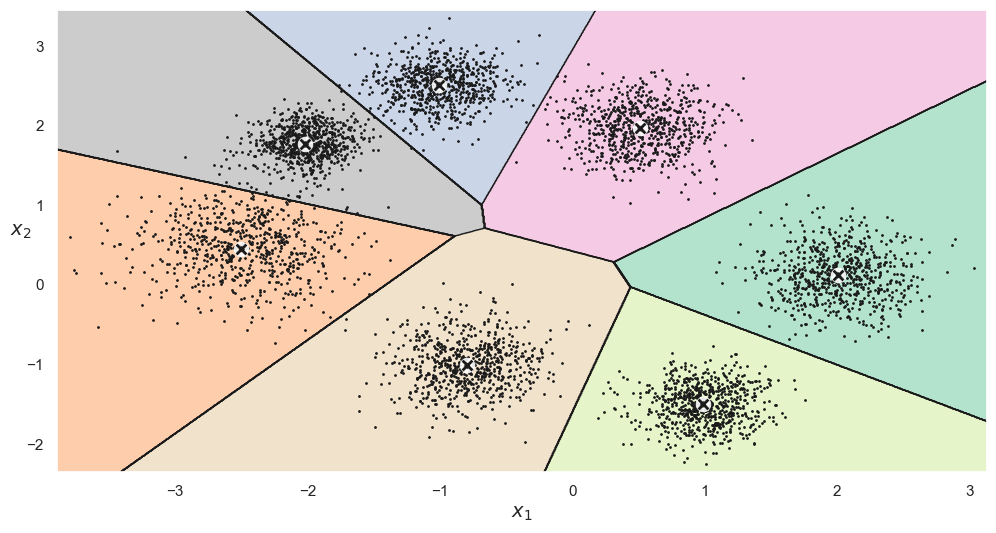

In [114]:
plt.figure(figsize=(12, 6))

# Llama a la función plot_decision_boundaries para visualizar los límites de decisión del modelo kmeans sobre el conjunto de datos X
plot_decision_boundaries(kmeans, X)

# Muestra la figura que contiene la visualización de los límites de decisión
plt.show()


El conjunto de funciones proporcionado permite visualizar de manera interactiva y comprensible cómo un algoritmo de clustering divide un conjunto de datos X en diferentes clusters. La función plot_data(X) muestra las muestras de datos como puntos en un plano cartesiano, donde cada punto representa una muestra con dos características (X[:, 0] y X[:, 1]). La función plot_centroids(centroids) grafica los centroides de los clusters como círculos grandes y cruces pequeñas, proporcionando una representación visual de la ubicación de los clusters en relación con los datos. La función principal plot_decision_boundaries(clusterer, X) calcula y grafica los límites de decisión del algoritmo de clustering sobre una malla de puntos, mostrando cómo se separan y agrupan los datos en diferentes regiones de acuerdo con el modelo de clustering utilizado (clusterer). Esto permite visualizar de manera clara cómo los datos están agrupados y cómo se definen las fronteras entre los clusters en el espacio de características. Las etiquetas de los ejes x e y indican las dimensiones de las características utilizadas en la visualización, proporcionando contexto adicional sobre los datos representados en la gráfica. En conjunto, estas funciones facilitan la interpretación y evaluación visual de los resultados del clustering.

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [115]:
# Calcular las distancias de cada muestra de X_new a los centroides de los clusters
distances_to_centroids = kmeans.transform(X_new)

# 'distances_to_centroids' es una matriz donde cada fila corresponde a una muestra en X_new
# y cada columna representa la distancia de esa muestra a un centroide específico del cluster.

# Mostramos las distancias de cada muestra a los centroides de los clusters:
print(distances_to_centroids.shape)
print(distances_to_centroids)


(7, 7)
[[3.71127267 4.25709485 5.59899576 5.00193646 1.79365714 2.14861891
  5.18070452]
 [5.1916606  1.16654424 2.23499146 3.54022745 4.99059935 3.33662446
  1.0184334 ]
 [3.5437522  2.15839417 0.50804442 1.50826229 4.02635483 3.01062804
  1.04373432]
 [5.54148147 2.11363205 1.99478118 3.54698165 5.6489187  4.14007837
  1.22249581]
 [1.12267554 4.72552844 4.61926655 3.32908631 1.1309103  2.79430864
  4.88137359]
 [1.01307788 3.52703386 3.21109307 2.03637639 1.50215949 2.05590229
  3.49976178]
 [4.53329026 2.49698601 4.61646822 4.70101332 3.0278797  1.56413683
  3.77140009]]


Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

Este código muestra cómo configurar y entrenar instancias de modelos K-Means con diferentes números máximos de iteraciones (max_iter) para ver cómo cambian los centroides y las asignaciones de clusters a medida que aumenta el número de iteraciones. Vamos a explicar cada parte:

In [116]:
# Creamos cuatro instancias de KMeans con diferentes configuraciones para el número de iteraciones máximas del algoritmo de optimización EM.
kmeans_iter1 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=1000, random_state=1)
kmeans_iter2 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=2000, random_state=4)
kmeans_iter3 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=3000, random_state=6)
# kmeans_iter4 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=4000, random_state=7)
# kmeans_iter5 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=5000, random_state=3)
# kmeans_iter6 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=6000, random_state=8)


# Ajustar cada modelo KMeans a los datos de entrada X
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
# kmeans_iter4.fit(X)
# kmeans_iter5.fit(X)
# kmeans_iter6.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=10000, n_clusters=7, n_init=1,
       random_state=7)

Esto permite comparar cómo evolucionan los centroides de los clusters en cada iteración y cómo afecta esto a la convergencia del algoritmo. Es una forma de explorar cómo el número de iteraciones afecta la calidad de la agrupación resultante.

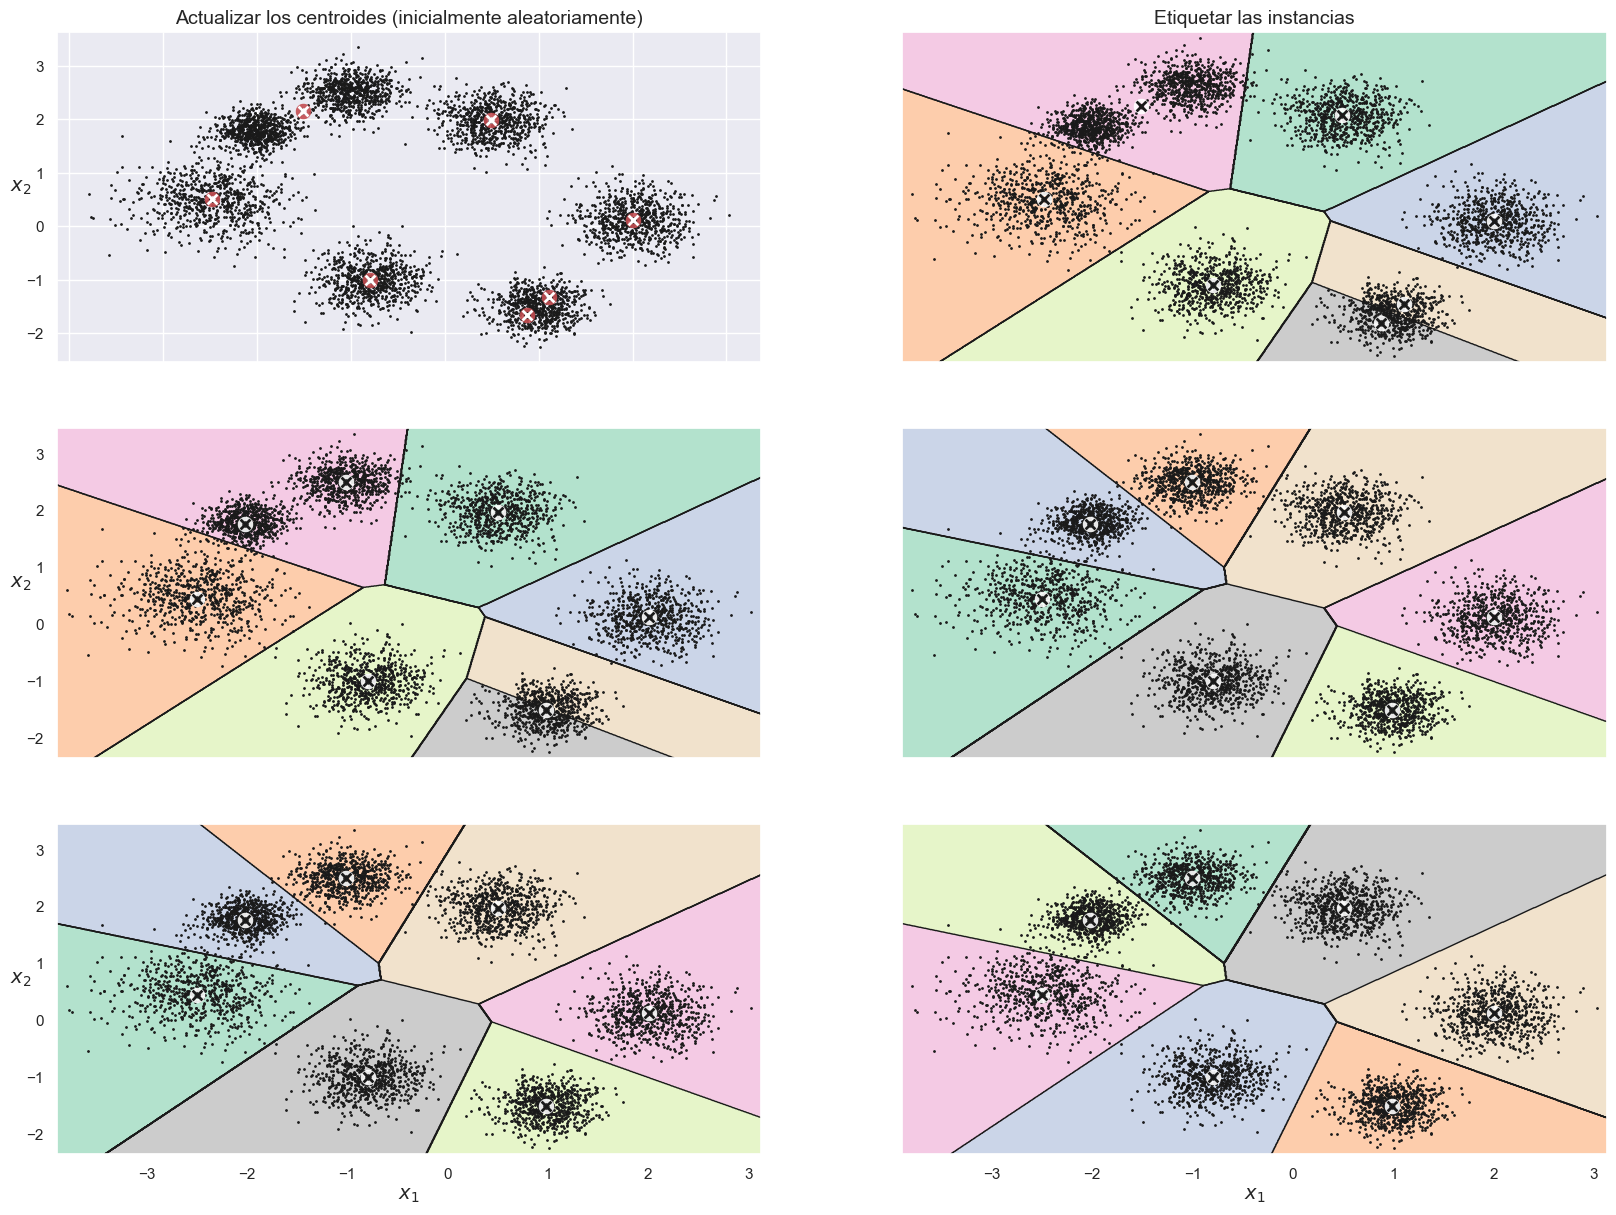

In [121]:
plt.figure(figsize=(20, 30))

# Subplot 1: Visualizar datos y centroides después de la inicialización aleatoria
plt.subplot(6, 2, 1)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizar los centroides (inicialmente aleatoriamente)", fontsize=14)

# Subplot 2: Visualizar los límites de decisión y etiquetar las instancias
plt.subplot(6, 2, 2)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiquetar las instancias", fontsize=14)

# Subplot 3: Visualizar límites de decisión sin centroides y luego añadir los del segundo modelo
"""Se eliminan los centroides del gráfico de límites de decisión y se grafican los 
nuevos centroides calculados después de otra iteración del algoritmo"""
plt.subplot(6, 2, 3)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# Subplot 4: Visualizar límites de decisión del segundo modelo
"""Selecciona la cuarta posición en la cuadrícula. Y se grafican los 
límites de decisión actualizados con el segundo modelo """
plt.subplot(6, 2, 4)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

# Subplot 5: Visualizar límites de decisión sin centroides y luego añadir los del tercer modelo
plt.subplot(6, 2, 5)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

# Subplot 6: Visualizar límites de decisión del tercer modelo
plt.subplot(6, 2, 6)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

# Mostrar todos los subplots juntos
plt.show()


Estos subgráficos proporcionan una representación visual de cómo el algoritmo K-Means progresa a través de las iteraciones y cómo se ajustan los centroides y los límites de los clusters para optimizar la separación de los datos en grupos coherentes. La evolución de los centroides y los límites de decisión se observa claramente a medida que se ejecutan más iteraciones del algoritmo.

Los "límites de decisión" en el contexto de algoritmos de clustering se refieren a las fronteras o líneas que separan las regiones del espacio de características en las cuales se asigna una muestra a un determinado cluster. Estos límites representan las divisiones que el algoritmo de clustering establece para dividir el espacio de características en grupos o clusters distintos.

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [132]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Ajustar clusterer1 y clusterer2 a los datos X
    clusterer1.fit(X)
    clusterer2.fit(X)

    # Crear una nueva figura con tamaño específico
    plt.figure(figsize=(15, 4))

    # Subtrama izquierda (primer gráfico)
    plt.subplot(121)
    # Graficar los límites de decisión y clusters para clusterer1
    plot_decision_boundaries(clusterer1, X)
    # Agregar título al gráfico si se proporciona title1
    if title1:
        plt.title(title1, fontsize=14)

    # Subtrama derecha (segundo gráfico)
    plt.subplot(122)
    # Graficar los límites de decisión y clusters para clusterer2 sin etiquetas en el eje y
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    # Agregar título al gráfico si se proporciona title2
    if title2:
        plt.title(title2, fontsize=14)


Esta función crea una figura con dos subgráficos lado a lado, donde cada subgráfico muestra los resultados de dos algoritmos de clustering diferentes aplicados a los mismos datos X. Esta visualización comparativa ayuda a evaluar y contrastar la efectividad de los diferentes métodos de clustering en la tarea dada.

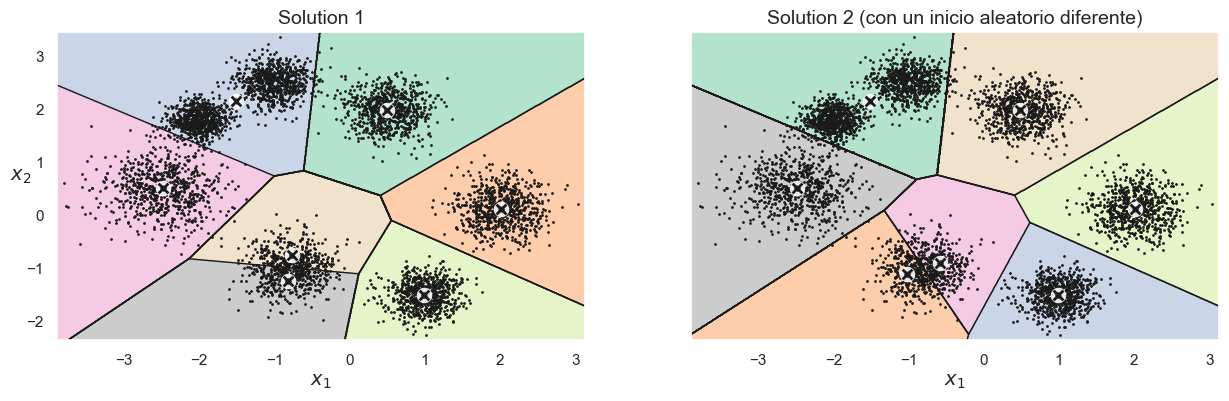

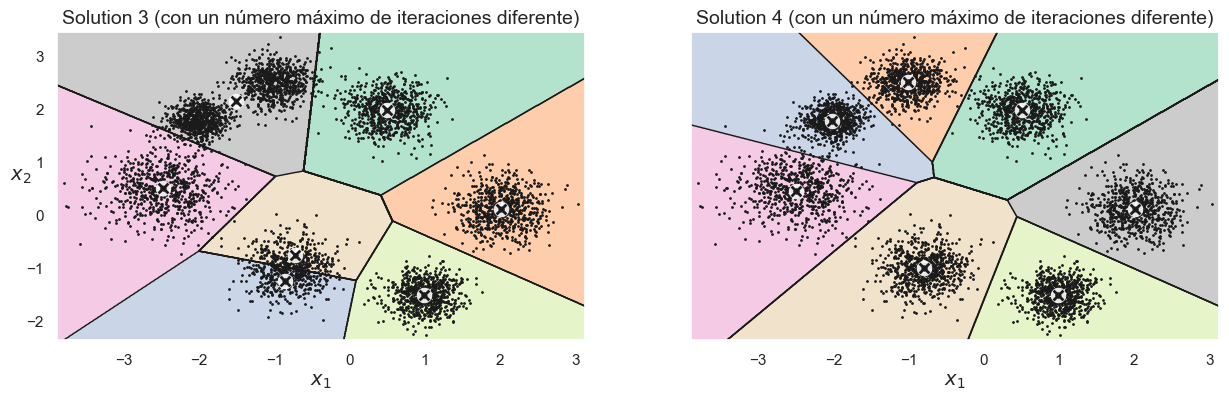

In [134]:
# Crear dos instancias de KMeans con diferentes configuraciones de inicialización aleatoria y algoritmo "elkan"
kmeans_rnd_init1 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", random_state=19)

# Llamar a la función plot_clusterer_comparison para comparar las soluciones de clustering
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (con un inicio aleatorio diferente)")


# Probamos con otras configuraciones de KMeans para ver cómo afectan a los límites de decisión y a los clusters identificados.
kmeans_rnd_init3 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=100, random_state=12)
kmeans_rnd_init4 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=200, random_state=15)

plot_clusterer_comparison(kmeans_rnd_init3, kmeans_rnd_init4, X, "Solution 3 (con un número máximo de iteraciones diferente)", "Solution 4 (con un número máximo de iteraciones diferente)")

# Mostramos las graficas 
plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [140]:

# Crear una instancia de KMeans sin especificar el método de inicialización (por defecto utiliza k-means++)
kmeans_rnd_10_inits = KMeans(n_clusters=7, init="random", n_init=10, algorithm="elkan", random_state=11)
# Ajustamos el modelo KMeans a los datos de entrada X utilizando el método fit()
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=7, n_init=10,
       random_state=11)

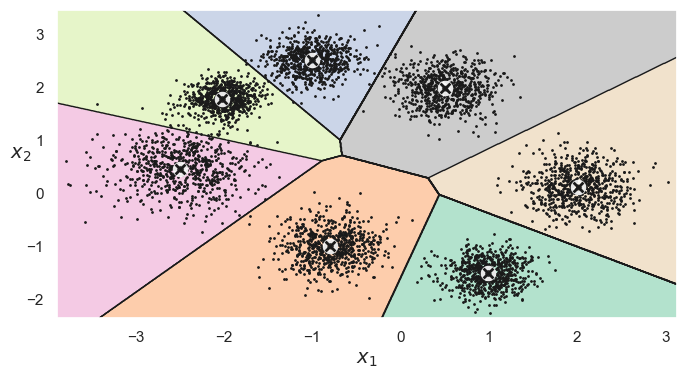

In [141]:
# Visualización de los límites de decisión generados por el algoritmo
plt.figure(figsize=(8, 4))

# Dibujamos los límites de decisión del modelo de clustering utilizando la función plot_decision_boundaries()
# Esta función muestra cómo se agrupan los datos según las decisiones de clustering realizadas por el modelo KMeans.
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [142]:
from sklearn.datasets import fetch_openml
import numpy as np

# Cargar el conjunto de datos MNIST desde OpenML
mnist = fetch_openml('mnist_784', version=1)

# Convertir las etiquetas del conjunto de datos a tipo int64
mnist.target = mnist.target.astype(np.int64)

In [143]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [148]:
def load_next_batch(batch_size):
    # np.random.choice(len(X), batch_size, replace=False) elige aleatoriamente índices de X sin reemplazo
    # batch_size es el tamaño del lote que queremos cargar un conjunto de datos mas pequeños
    indices = np.random.choice(len(X), batch_size, replace=False) 
    
    # Retorna las muestras correspondientes a los índices seleccionados de batch_size indices
    return X[indices]

Esta función load_next_batch se utiliza para cargar un lote aleatorio de datos de tamaño batch_size de la matriz X. Es útil para entrenar modelos de aprendizaje automático utilizando el método de descenso de gradiente estocástico (SGD) o para procesar grandes conjuntos de datos por lotes durante el entrenamiento.

In [149]:
# Importamos la clase MiniBatchKMeans de la librería sklearn.cluster
from sklearn.cluster import MiniBatchKMeans

# Definición de parámetros
k = 7  # Número de clústeres
n_init = 10  # Número de inicializaciones diferentes
n_iterations = 100  # Número máximo de iteraciones por inicialización

init_size = 500  # Tamaño del lote inicial para ajustar parcialmente el modelo
batch_size = 100  # Tamaño del lote utilizado en cada iteración
evaluate_on_last_n_iters = 10  # Número de últimas iteraciones utilizadas para evaluar el modelo

# Para almacenar el mejor modelo encontrado.
best_kmeans = None

# Bucle para realizar múltiples inicializaciones y seleccionar el mejor modelo
for init in range(n_init):
    # Crear una instancia de MiniBatchKMeans con los parámetros especificados
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    
    # Cargar un lote inicial para ajustar parcialmente el modelo
    X_init = load_next_batch(init_size)  # Es un lote inicial utilizado para ajustar parcialmente el modelo al principio.
    minibatch_kmeans.partial_fit(X_init) # Ajustar parcialmente el modelo

    # Inicializar la suma de la inercia total para evaluar el modelo
    minibatch_kmeans.sum_inertia_ = 0
    
    # Bucle para ajustar el modelo por lotes durante un número fijo de iteraciones
    for iteration in range(n_iterations):
        # Cargar un lote de datos para ajustar parcialmente el modelo
        X_batch = load_next_batch(batch_size) # Cada X_batch es una muestra aleatoria extraída del conjunto de datos completo.
        minibatch_kmeans.partial_fit(X_batch)
        
        # Calcular y acumular la inercia en las últimas iteraciones
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Actualizar el mejor modelo encontrado hasta ahora
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans


El código utiliza el algoritmo MiniBatchKMeans de Scikit-Learn para realizar múltiples inicializaciones y ajustes parciales del modelo de clustering. Durante cada inicialización, se ajusta el modelo parcialmente con un lote inicial de datos y luego se continúa ajustando con lotes de datos adicionales extraídos aleatoriamente. Se evalúa la calidad del modelo utilizando la inercia acumulada en las últimas iteraciones, y se selecciona el mejor modelo en función de esta métrica. En resumen, el objetivo es encontrar el modelo MiniBatchKMeans más efectivo mediante un proceso iterativo de ajuste parcial y evaluación.

Al finalizar el bucle, best_kmeans contendrá el modelo MiniBatchKMeans que tiene la menor suma de inercia acumulada entre todas las inicializaciones, lo que representa la mejor solución encontrada según estos criterios.

La Inercia mide cuán compactos y bien separados están los clusters. Un valor más bajo de inercia indica que los puntos dentro de cada cluster están más cerca de su centroide, lo que se considera un mejor clustering.

In [154]:
# Calcular la puntuación del modelo `best_kmeans` aplicado a los datos `X`
best_kmeans.score(X)

print(best_kmeans.score(X))

# Visualizar los centroides del modelo `best_kmeans`
print(best_kmeans.cluster_centers_)

"""La puntuación en este contexto representa la negación de la inercia del modelo.
Una puntuación más alta (menos negativa) indica una mejor agrupación de los datos."""

-828.0639525131544
[[ 0.51004237  1.98345773]
 [-0.7892986  -1.01050223]
 [-2.01426188  1.76607633]
 [-0.99686886  2.50753496]
 [ 2.00734857  0.1202287 ]
 [ 0.99850443 -1.50510917]
 [-2.49960257  0.4456241 ]]


'La puntuación en este contexto representa la negación de la inercia del modelo.\nUna puntuación más alta (menos negativa) indica una mejor agrupación de los datos.'

## **Encontrando el número óptimo de Clusters (grupos)**

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [155]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para evaluar la calidad de los clústeres
silhouette_score(X, kmeans.labels_)

0.6641857851196089

El coeficiente de silueta se utiliza para evaluar la calidad de la agrupación. Un valor de coeficiente de silueta cercano a 1 indica una buena separación entre los clústeres y una mala separación entre diferentes clústeres, mientras que un valor cercano a -1 indica que las muestras pueden estar asignadas al grupo incorrecto. Un valor cercano a 0 indica que las muestras están cerca de la frontera entre dos clústeres.

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo.

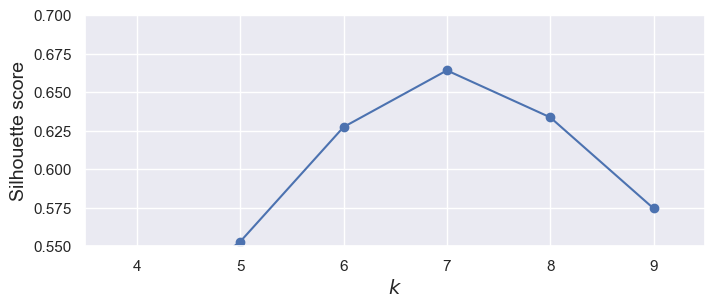

In [188]:
# Crear una lista de modelos KMeans ajustados para diferentes números de clusters (de 1 a n)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

# Calcular el coeficiente de silueta para cada modelo KMeans (excepto el primero, con un solo cluster)
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a n)
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Establecer los límites de los ejes x e y para enfocar la visualización en un rango específico
plt.axis([3.5, 9.5, 0.55, 0.7])

plt.show()


En la gráfica resultante, el eje x representa el número de clusters (k), mientras que el eje y representa el valor del coeficiente de silueta. El objetivo es identificar el número óptimo de clusters (k) que maximiza el coeficiente de silueta, lo cual indica la mejor estructura de agrupación para los datos. En este ejemplo, la gráfica muestra cómo varía el coeficiente de silueta a medida que cambia el número de clusters, ayudando a seleccionar el número de clusters más adecuado para el problema de clustering.

In [181]:
print(kmeans_per_k)
# Imprimir los coeficientes de silueta para cada modelo KMeans ajustado
silhouette_scores

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42)]


[0.5142729942203046,
 0.5004698053338312,
 0.5018787333038701,
 0.553017495921583,
 0.627418826233271,
 0.6641857851196089,
 0.6336939502610852,
 0.5745550209588156]

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

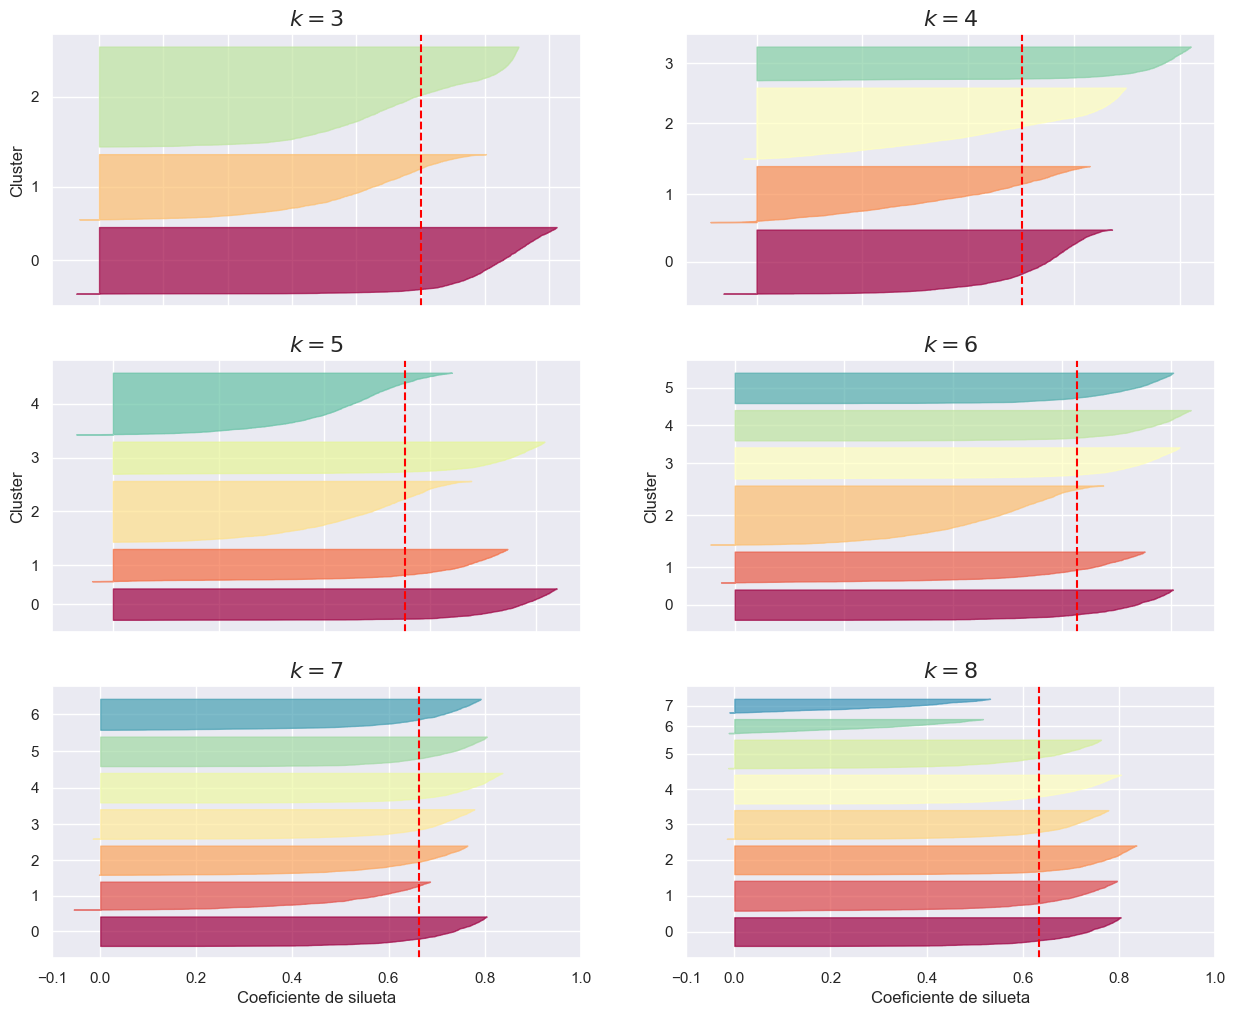

In [204]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Configurar la figura para mostrar los subplots
plt.figure(figsize=(15, 12))

# Iterar sobre diferentes valores de k para crear subplots
for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)  # Seleccionar la posición del subplot en la cuadrícula

    # Obtener las etiquetas predichas por el modelo de k-means para el valor actual de k
    y_pred = kmeans_per_k[k - 1].labels_

    # Calcular los coeficientes de silueta para cada muestra
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30  # Espaciado entre clusters en el gráfico
    pos = padding  # Posición inicial para los clusters en el gráfico
    ticks = []  # Lista de posiciones de los ticks del eje y

    # Iterar sobre cada cluster (i) dentro del valor actual de k
    for i in range(k):
        # Seleccionar los coeficientes de silueta para el cluster i
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()  # Ordenar los coeficientes de silueta

        # Asignar un color al área de relleno según el cluster
        color = mpl.cm.Spectral(i / k)
        
        # Rellenar el área entre los coeficientes de silueta para el cluster i
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Calcular la posición del tick para el cluster en el eje y
        ticks.append(pos + len(coeffs) // 2)
        
        # Actualizar la posición para el próximo cluster
        pos += len(coeffs) + padding

    # Configurar los ticks y etiquetas del eje y
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    # Configuración de etiquetas en los ejes
    if k in (3, 5):
        plt.ylabel("Cluster")
        
    if k in (5, 6):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de silueta")
    else:
        plt.tick_params(labelbottom=False)

    # Dibujar una línea vertical en el coeficiente de silueta global para el valor de k actual
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    
    # Configurar el título del subplot
    plt.title("$k={}$".format(k), fontsize=16)

# Mostrar la figura con los subplots de los diagramas de silueta
plt.show()


EL código utiliza los coeficientes de silueta para visualizar cómo están distribuidas las muestras dentro de cada cluster para diferentes valores de k, ayudando a identificar el número óptimo de clusters mediante el análisis de la cohesión interna y la separación entre clusters. La línea vertical roja indica el valor global del coeficiente de silueta para cada número de clusters, lo que facilita la comparación y selección del número óptimo de clusters.

## ==========================================================================================================

# **K-Means para aprendizaje semi-supervisado**

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

In [1]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [2]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Obtenemos los datos
df = pd.read_csv('./typedCSV.csv', delimiter=',')
df

label  pixel 0  pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  \
0          0      255      255      255      255      255      255      255   
1          0      255      255      255      255      255      255      255   
2          0      255      255      255      255      255      255      255   
3          0      255      255      255      255      255      255      255   
4          0      255      253      255      253      251      255      254   
...      ...      ...      ...      ...      ...      ...      ...      ...   
62987     61      255      252      254      255      253      255      255   
62988     61      255      254      254      254      253      255      252   
62989     61      255      252      255      255      254      255      254   
62990     61      252      254      255      255      255      254      255   
62991     61      255      255      255      254      255      255      254   

       pixel 7  pixel 8  pixel 9  pixel 10  pixel 11  pixel 12  pixel 13  \
0          255      253      253       255       255       251       255   
1          255      255      255       255       252       255       249   
2          255      254      255       255       250       255       253   
3          255      255      255       253       255       255       255   
4          255      255      255       249       255       255       255   
...        ...      ...      ...       ...       ...       ...       ...   
62987      253      255      255       255       255       255       255   
62988      254      255      255       255       255       255       255   
62989      255      254      255       255       255       254       255   
62990      248      255      255       255       255       255       255   
62991      254      255      255       255       255       255       255   

       pixel 14  pixel 15  pixel 16  pixel 17  pixel 18  pixel 19  pixel 20  \
0           253       255       255       255       254       255       254   
1           254       254       255       250       255       250       255   
2           255       254       252       255       255       250       255   
3           254       255       255       254       255       255       255   
4           255       254       255       250       255       255       251   
...         ...       ...       ...       ...       ...       ...       ...   
62987       255       255       254       255       255       251       255   
62988       255       255       255       251       253       255       255   
62989       255       254       255       251       255       255       255   
62990       255       255       254       251       255       254       252   
62991       255       255       254       255       250       255       254   

       pixel 21  pixel 22  pixel 23  pixel 24  pixel 25  pixel 26  pixel 27  \
0           255       255       255       255       255       255       255   
1           255       252       255       255       255       255       255   
2           255       252       255       255       255       255       255   
3           252       255       255       255       255       255       255   
4           255       254       251       255       255       255       255   
...         ...       ...       ...       ...       ...       ...       ...   
62987       255       254       255       254       253       254       255   
62988       253       253       255       255       255       255       255   
62989       253       252       255       255       255       255       255   
62990       255       247       255       255       254       254       255   
62991       255       255       254       251       253       255       253   

       pixel 28  pixel 29  pixel 30  pixel 31  pixel 32  pixel 33  pixel 34  \
0           255       255       255       255       255       255       255   
1           255       255       255       255       255       255       255   
2         

In [4]:
# Definir el rango de las etiquetas que desamos seleccionar 
start_label = 10
end_label = 35

# Filtrar las filas del DataFrame que contienen las etiquetas seleccionadas
df_filtered = df.loc[df['label'].between(start_label, end_label)]

# Creamos un nuevo dataset con las filas seleccionadas
data = pd.DataFrame(df_filtered)

# Mostramos los nuevos datos
print(data.shape)
data

(26416, 785)


label  pixel 0  pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  \
10160     10      255      255      255      255      255      255      255   
10161     10      255      255      255      255      255      255      255   
10162     10      255      255      255      255      255      255      255   
10163     10      255      255      255      255      255      255      255   
10164     10      255      255      255      255      255      255      255   
...      ...      ...      ...      ...      ...      ...      ...      ...   
36571     35      255      255      252      251      255      255      255   
36572     35      255      254      255      255      255      255      252   
36573     35      254      255      255      255      255      251      253   
36574     35      255      255      255      255      255      255      255   
36575     35      255      255      252      251      255      255      255   

       pixel 7  pixel 8  pixel 9  pixel 10  pixel 11  pixel 12  pixel 13  \
10160      255      254      255       254       255       255       255   
10161      255      255      253       255       255       252       255   
10162      255      255      255       255       255       255       255   
10163      255      255      253       251       255       255       255   
10164      255      255      255       255       254       255       255   
...        ...      ...      ...       ...       ...       ...       ...   
36571      254      255      255       251       254       255       253   
36572      255      255      255       255       255       255       255   
36573      255      255      255       255       255       255       255   
36574      255      255      255       252       255       255       255   
36575      254      255      255       251       254       255       253   

       pixel 14  pixel 15  pixel 16  pixel 17  pixel 18  pixel 19  pixel 20  \
10160       255       252       255       255       255       255       255   
10161       252       255       251       255       250       254       255   
10162       255       255       255       254       254       255       255   
10163       255       255       255       252       255       253       255   
10164       250       255       255       251       255       255       252   
...         ...       ...       ...       ...       ...       ...       ...   
36571       254       254       253       255       254       255       255   
36572       255       255       255       255       255       252       255   
36573       254       254       254       255       255       254       255   
36574       255       252       253       255       251       255       252   
36575       254       254       253       255       254       255       255   

       pixel 21  pixel 22  pixel 23  pixel 24  pixel 25  pixel 26  pixel 27  \
10160       255       255       255       255       255       255       255   
10161       255       252       255       255       255       255       255   
10162       249       255       253       255       255       255       255   
10163       253       250       255       255       255       255       255   
10164       255       255       253       255       255       255       255   
...         ...       ...       ...       ...       ...       ...       ...   
36571       252       255       255       255       255       255       255   
36572       255       255       252       255       255       255       255   
36573       251       255       252       255       255       255       255   
36574       255       255       254       255       255       255       255   
36575       252       255       255       255       255       255       255   

       pixel 28  pixel 29  pixel 30  pixel 31  pixel 32  pixel 33  pixel 34  \
10160       255       255       255       255       255       255       255   
10161       255       255       255       255       255       255       255   
10162     

In [5]:
# Mezclamos el conjunto de datos para que esten de manera aleatoria
data_ = shuffle(data, random_state=42)

In [6]:

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']
m_train = len(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 21132
El 20% de ejemplos que seran para el entrenamiento son: 5284


In [7]:
# Mostramos los datos de entrenamiento 
X_train

pixel 0  pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  \
24826      255      255      255      255      255      255      255      255   
16362      255      255      255      255      255      255      255      255   
21512      255      252      253      255      254      255      255      251   
35285      252      255      252      255      254      253      253      255   
28995      255      255      255      251      255      253      255      255   
...        ...      ...      ...      ...      ...      ...      ...      ...   
31735      255      255      252      255      250      253      255      255   
15550      255      255      255      255      255      255      255      255   
11020      254      255      254      255      255      255      255      254   
25955      255      255      255      255      255      255      255      255   
33814      255      255      255      255      255      255      255      255   

       pixel 8  pixel 9  pixel 10  pixel 11  pixel 12  pixel 13  pixel 14  \
24826      255      249       253       255       247       255       255   
16362      253      255       255       255       251       255       255   
21512      255      251       255       255       252       255       255   
35285      255      255       255       255       255       255       255   
28995      255      252       252       254       255       254       253   
...        ...      ...       ...       ...       ...       ...       ...   
31735      254      255       254       255       254       255       254   
15550      254      255       255       255       249       255       253   
11020      254      252       255       255       251       255       251   
25955      255      250       255       255       255       252       255   
33814      255      249       255       255       251       255       255   

       pixel 15  pixel 16  pixel 17  pixel 18  pixel 19  pixel 20  pixel 21  \
24826       255       255       255       255       252       255       249   
16362       253       255       254       254       255       255       248   
21512       255       255       255       255       255       255       255   
35285       253       255       252       255       255       251       255   
28995       255       255       255       255       255       255       255   
...         ...       ...       ...       ...       ...       ...       ...   
31735       255       255       255       255       255       253       255   
15550       253       254       255       255       250       255       254   
11020       255       255       255       255       255       255       255   
25955       253       252       255       255       248       255       254   
33814       254       255       254       255       252       255       254   

       pixel 22  pixel 23  pixel 24  pixel 25  pixel 26  pixel 27  pixel 28  \
24826       253       255       255       255       255       255       255   
16362       255       255       255       255       255       255       255   
21512       255       255       255       255       255       255       253   
35285       250       255       255       255       255       255       255   
28995       255       254       255       255       255       255       252   
...         ...       ...       ...       ...       ...       ...       ...   
31735       255       255       252       255       255       250       255   
15550       251       255       255       253       253       255       255   
11020       255       255       255       255       255       255       255   
25955       255       255       255       254       255       254       255   
33814       255       253       255       254       255       255       255   

       pixel 29  pixel 30  pixel 31  pixel 32  pixel 33  pixel 34  pixel 35  \
24826       255       255       255       255       255       255       255   
16362       255       255       255       255       2

## **Normalización de los datos de Entrenamiento y Prueba**

In [8]:
# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [9]:
# Mostramos los datos de entrenamiento normalizados
X_train_

pixel 0   pixel 1   pixel 2   pixel 3   pixel 4   pixel 5   pixel 6  \
24826  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
16362  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
21512  1.000000  0.988235  0.992157  1.000000  0.996078  1.000000  1.000000   
35285  0.988235  1.000000  0.988235  1.000000  0.996078  0.992157  0.992157   
28995  1.000000  1.000000  1.000000  0.984314  1.000000  0.992157  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
31735  1.000000  1.000000  0.988235  1.000000  0.980392  0.992157  1.000000   
15550  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
11020  0.996078  1.000000  0.996078  1.000000  1.000000  1.000000  1.000000   
25955  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
33814  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

        pixel 7   pixel 8   pixel 9  pixel 10  pixel 11  pixel 12  pixel 13  \
24826  1.000000  1.000000  0.976471  0.992157  1.000000  0.968627  1.000000   
16362  1.000000  0.992157  1.000000  1.000000  1.000000  0.984314  1.000000   
21512  0.984314  1.000000  0.984314  1.000000  1.000000  0.988235  1.000000   
35285  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
28995  1.000000  1.000000  0.988235  0.988235  0.996078  1.000000  0.996078   
...         ...       ...       ...       ...       ...       ...       ...   
31735  1.000000  0.996078  1.000000  0.996078  1.000000  0.996078  1.000000   
15550  1.000000  0.996078  1.000000  1.000000  1.000000  0.976471  1.000000   
11020  0.996078  0.996078  0.988235  1.000000  1.000000  0.984314  1.000000   
25955  1.000000  1.000000  0.980392  1.000000  1.000000  1.000000  0.988235   
33814  1.000000  1.000000  0.976471  1.000000  1.000000  0.984314  1.000000   

       pixel 14  pixel 15  pixel 16  pixel 17  pixel 18  pixel 19  pixel 20  \
24826  1.000000  1.000000  1.000000  1.000000  1.000000  0.988235  1.000000   
16362  1.000000  0.992157  1.000000  0.996078  0.996078  1.000000  1.000000   
21512  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
35285  1.000000  0.992157  1.000000  0.988235  1.000000  1.000000  0.984314   
28995  0.992157  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
31735  0.996078  1.000000  1.000000  1.000000  1.000000  1.000000  0.992157   
15550  0.992157  0.992157  0.996078  1.000000  1.000000  0.980392  1.000000   
11020  0.984314  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
25955  1.000000  0.992157  0.988235  1.000000  1.000000  0.972549  1.000000   
33814  1.000000  0.996078  1.000000  0.996078  1.000000  0.988235  1.000000   

       pixel 21  pixel 22  pixel 23  pixel 24  pixel 25  pixel 26  pixel 27  \
24826  0.976471  0.992157  1.000000  1.000000  1.000000  1.000000  1.000000   
16362  0.972549  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
21512  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
35285  1.000000  0.980392  1.000000  1.000000  1.000000  1.000000  1.000000   
28995  1.000000  1.000000  0.996078  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
31735  1.000000  1.000000  1.000000  0.988235  1.000000  1.000000  0.980392   
15550  0.996078  0.984314  1.000000  1.000000  0.992157  0.992157  1.000000   
11020  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
25955  0.996078  1.000000  1.000000  1.000000  0.996078  1.000000  0.996078   
33814  0.996078  1.000000  0.992157  1.000000  0.996078  1.000000  1.000000   

       pixel 28  pixel 29  pixel 30  pixel 31  pixel 32  pixel 33  pixel 34  \
24826  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  1.000000   
16362  1.000000  1.000000  1.000000  1.000000  1.00000

## **Encontrando el número óptimo de Clusters (grupos)**

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [10]:
from sklearn.cluster import KMeans

k = 200
kmeans = KMeans(n_clusters=k, random_state=42)

X_digits_dist = kmeans.fit_transform(X_train_)

c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [11]:
from sklearn.metrics import silhouette_score

# Calculamos el coeficiente de silueta para evaluar la calidad de los clústeres
silhouette_score(X_train_, kmeans.labels_)

0.1630962868170124

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo.

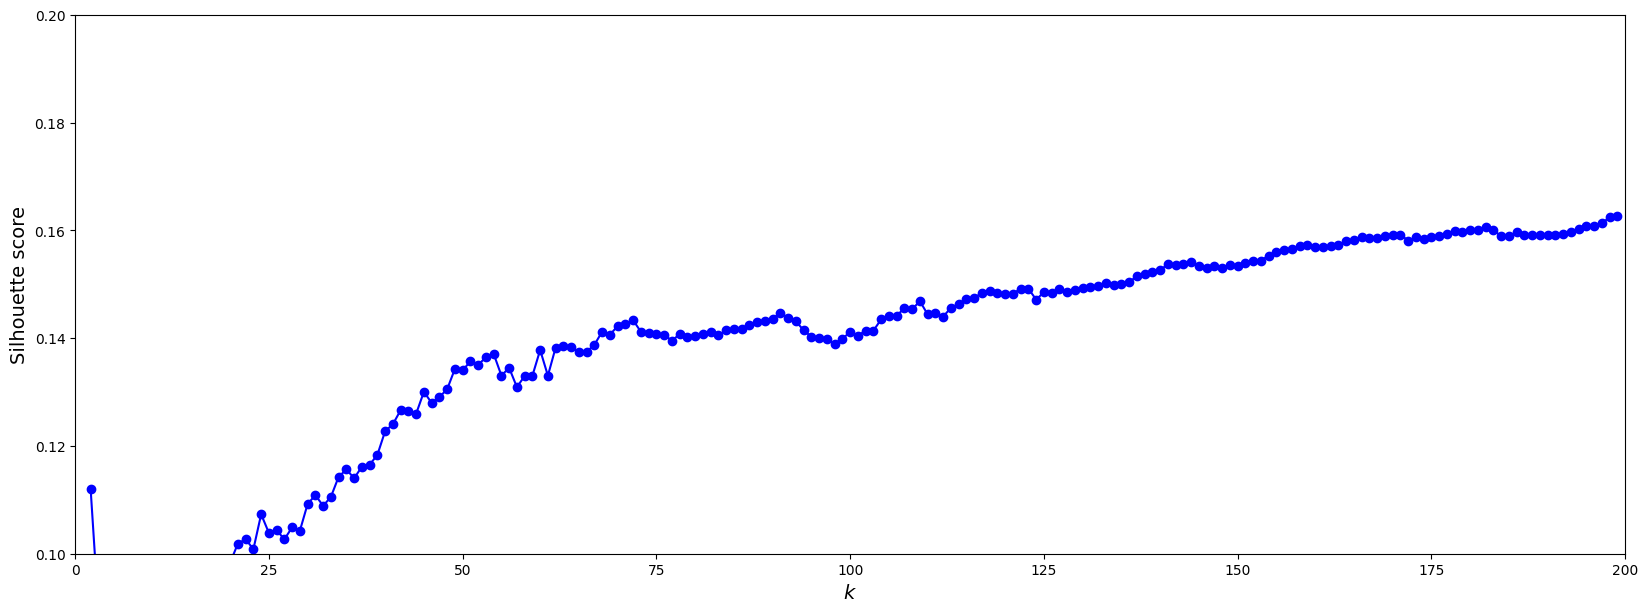

In [13]:
from sklearn.metrics import silhouette_score

# Creamos una lista de modelos de Means ajustados para diferentes números de clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_) for k in range(1, 200)]

# Calculamos los coeficientes de silueta para cada modelo KMeans (excepto el primero, con un solo cluster)
silhouette_scores = [silhouette_score(X_train_, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(20, 7))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a n)
plt.plot(range(2, 200), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Establecemos los límites de los ejes de X e Y para enfocar la visualización en un rango específico
plt.axis([0, 200, 0.1, 0.20])

plt.show()

In [14]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 199


Visualizando la gráfica podemos observar la estructura y distribución de los datos. Esto nos ayudará a entender mejor el conjunto de datos y a identificar posibles patrones o agrupaciones que puedan ser relevantes para realizar un análisis de agrupamiento (clustering) efectivo. En este caso nos da una valor máximo de entre 190 a 195, por lo que podriamos considera como número  de clusters.

In [16]:
print(kmeans_per_k)

# Imprimir los coeficientes de silueta para cada modelo KMeans ajustado
silhouette_scores

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42), KMeans(n_clusters=10, random_state=42), KMeans(n_clusters=11, random_state=42), KMeans(n_clusters=12, random_state=42), KMeans(n_clusters=13, random_state=42), KMeans(n_clusters=14, random_state=42), KMeans(n_clusters=15, random_state=42), KMeans(n_clusters=16, random_state=42), KMeans(n_clusters=17, random_state=42), KMeans(n_clusters=18, random_state=42), KMeans(n_clusters=19, random_state=42), KMeans(n_clusters=20, random_state=42), KMeans(n_clusters=21, random_state=42), KMeans(n_clusters=22, random_state=42), KMeans(n_clusters=23, random_state=42), KMeans(n_clusters=24, random_state=42), KMeans(n_clusters=25, random_state=42), KMeans(n_clusters=26, 

[0.11192952213004043,
 0.0896337712475485,
 0.07764740589731763,
 0.07170409618091665,
 0.07549034706852994,
 0.07384794667863541,
 0.06627423241642486,
 0.07611756107092744,
 0.0762063337836135,
 0.07904161911394633,
 0.0813922074582343,
 0.08281835979668872,
 0.08087810022138318,
 0.08426862129752986,
 0.08592801499972723,
 0.08873049740332985,
 0.08995460071474387,
 0.09771145221942307,
 0.0983431509896775,
 0.1018883106812832,
 0.10268199145660338,
 0.1008400384339477,
 0.10731974769498426,
 0.10385342758653913,
 0.10435460488892315,
 0.10268061858679772,
 0.10490132837181532,
 0.10427308587646035,
 0.1092502643981159,
 0.1108532952222722,
 0.10888820655882887,
 0.11054662778791378,
 0.11427971009961571,
 0.11562979611227647,
 0.11400788175226326,
 0.1161392391036346,
 0.11650506873230304,
 0.11835708392972823,
 0.12274324700853786,
 0.12402848595622895,
 0.12664101094972824,
 0.12646748553827072,
 0.12597509763585776,
 0.13004755090785589,
 0.12797176174320346,
 0.1290730939389597

# **K-Means para aprendizaje semi-supervisado**

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

In [17]:
from sklearn.cluster import KMeans

k = 199  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(X_train_)


Este método ajusta el modelo KMeans a los datos y luego transforma los datos en distancias euclidianas desde cada punto de datos hasta los centroides de los clusters. Esto significa que X_digits_dist contendrá las distancias de cada punto en X_train_ a cada uno de los 100 centroides de los clusters.

In [18]:
# Mostramos el número de ejemplos en cada grupo
print(X_digits_dist.shape)
# Mostramos las distancias de cada muestra a los centroides de los k clusters
print(X_digits_dist)

(21132, 199)
[[ 9.06476167  8.36495218  7.90115568 ...  9.37373307  9.21055189
  12.31163129]
 [10.02197487  8.38427689  7.27460618 ...  8.68341175  8.9679237
  12.92101055]
 [ 8.52543334  8.99227229  8.94953979 ...  9.20471536  5.82761493
  12.48760155]
 ...
 [ 9.50715321  9.67805288  9.41318848 ...  8.49423291  8.14086662
  11.82807462]
 [11.19677487  6.23500308  9.21699693 ...  8.73219733  9.44013823
  11.13779848]
 [10.76317179  8.41094635  6.31720817 ...  9.24898723  9.62205363
  14.05329395]]


In [19]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = X_train_.values[idxs]

El resultado **idxs** es un arreglo de índices que indican las filas donde se encuentran los valores mínimos en cada columna.

**X_representative_digits**: contendrá las filas seleccionadas de X_train_ que corresponden a los índices donde se encontraron los valores mínimos en cada columna de X_digits_dist.

Después de aplicar KMeans para encontrar los puntos representativos de cada cluster. Estos puntos representativos son aquellos puntos en el conjunto de datos X_train_ que están más cerca de los centroides identificados por KMeans.

In [20]:
# Imprimimos los indices de los puntos minimos 
print(idxs.shape)
print(idxs)

# Imprimimos los puntos de las muestras representativos
print(X_representative_digits.shape)
print(X_representative_digits)

(199,)
[11939  6360  7229  6043  9886  7407  1283  2091  8370  5381 12948 19589
  7187  3611  4013 14260  4552   345 13466 14534 16608 15558  5197  7780
   556 10537 10127   138  7387  7788 19535  5996  9911  5966  4906 18740
  6232 12506  8190  2054 13029 20470   697 12075  5145  5273 18871 11521
 17682  2538  3813  8947  3258   305 17231   631  3672  3120  8707  3329
  6230  3121  8233 11873 11255 18149  5020 13806 14592   180 21003   982
 15328  5267  3935 10592  5369  2965 17031 10850 11855 11535  6828  5345
 10779 17967 19794  1236 19117  1426   764  3498 14204 15962  8387   441
  8400  9358 18253 10882  2971 11164  7810  8274   277 20482   639  4360
 16738  1483  4909  1704  2822  7119 19424  8932  2240 18879  9524  2979
  9227 19576 14420 11891  8757 14951  6510  3082 20371   268  4458 13172
  1747 15361 18574 15864  1530  2316  6150   413   499 10629 18588 15381
  2432  6293 15295  1011 19704 16580 11853  7386 11306  8136  7435 19053
  8087  4447  3923 14748 14127 20655  7970  

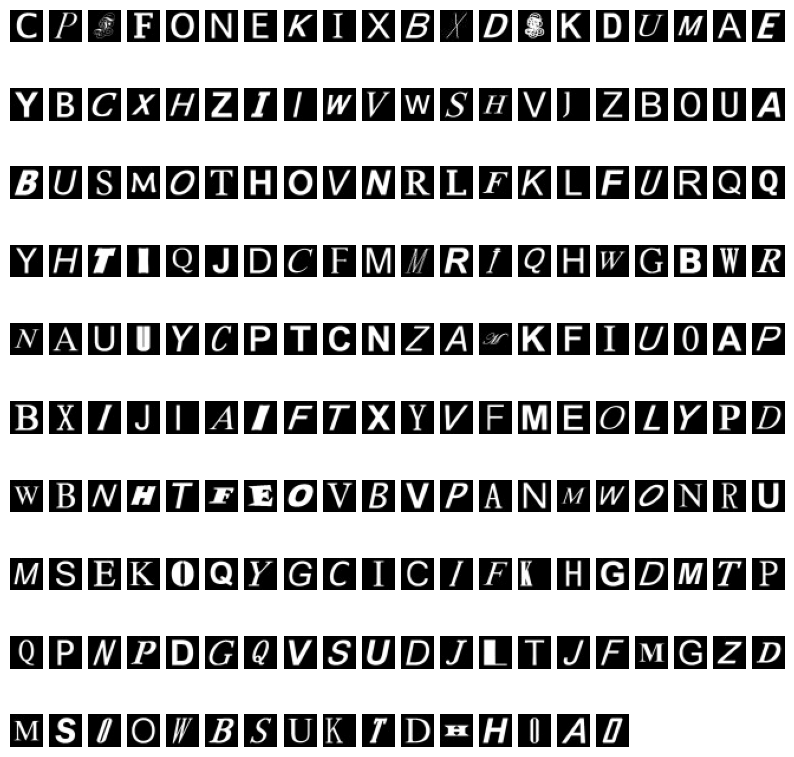

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Determinar el número máximo de subplots a mostrar (máximo 196 en una cuadrícula de 14x14)
max_subplots = min(len(X_representative_digits), 196)

for index in range(max_subplots):
    plt.subplot(10, 20, index + 1)
    
    # Mostrar la imagen del dígito representativo correspondiente al índice actual
    plt.imshow(X_representative_digits[index].reshape(28, 28), cmap="binary")
    plt.axis('off')

plt.show()


Son las imágenes mas representativos de cada uno de los clusters, o sea las imagenes que son mas cercanos a un centroide dentro de un clusters.

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas

In [23]:
# Obtener las etiquetas verdaderas de los dígitos representativos encontrados por K-means
y_representative_digits = y_train.values[idxs]

# Mostramos las etiquetas de las muestras representativas
print(y_representative_digits.shape)
print(y_representative_digits)

(199,)
[12 25 15 15 24 23 14 20 18 33 11 33 13 15 20 13 30 22 10 14 34 11 12 33
 17 35 18 18 32 31 32 28 17 31 19 35 11 24 30 10 11 30 28 22 24 29 17 24
 31 23 27 21 15 20 21 15 30 27 26 26 34 17 29 18 26 19 13 12 15 22 22 27
 18 26 17 32 16 11 32 27 23 10 30 30 34 12 25 29 12 23 35 10 22 20 15 18
 30 24 10 25 11 33 18 19 18 10 18 15 29 33 34 31 15 22 14 24 21 34 25 13
 32 11 23 17 29 15 14 24 31 11 31 25 10 23 22 32 24 23 27 30 22 28 14 20
 24 26 34 16 12 18 12 18 15 20 17 16 13 22 29 25 26 25 23 25 13 16 26 31
 28 30 13 19 21 29 19 15 22 16 35 13 22 28 24 24 32 11 28 30 20 29 13 17
 17 24 10 24 25 21 11]


Asigna manualmente las etiquetas verdaderas a los dígitos representativos encontrados por el algoritmo K-means. Esto es útil para poder comparar y evaluar cómo se agruparon las imágenes en función de sus similitudes visuales y etiquetas reales.

## **Entrenamiento de un clasificador**

Y entrenaremos un clasificador usando estas imágenes representativas.

Después de haber seleccionado las muestras representativas (X_representative_digits) y sus etiquetas correspondientes (y_representative_digits), el siguiente bloque de código entrena un clasificador de regresión logística utilizando estas muestras representativas como conjunto de entrenamiento.

In [30]:
from sklearn.linear_model import LogisticRegression

# Crear un clasificador de regresión logística
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)

# Entrenar el clasificador con los datos representativos y sus etiquetas
%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Calcular el puntaje de precisión del clasificador en el conjunto de prueba
log_reg2.score(X_test_, y_test)

CPU times: total: 46.9 ms
Wall time: 434 ms


c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7437547312641938

Como puedes observar hemos obtenido una precisión de casi el  58%  habiendo anotado simplemente 300 imágenes, pero aquellas más representativas. Entrenar el mismo modelo con 300 imágenes aleatorias nos daría peores resultados.

In [31]:
# Crear un clasificador de regresión logística
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)

# Entrenar el clasificador con una porción de los datos de entrenamiento y sus etiquetas correspondientes
%time log_reg.fit(X_train_, y_train)

# Calcular el puntaje de precisión del clasificador en el conjunto de prueba completo
log_reg.score(X_test_, y_test)

CPU times: total: 1min 3s
Wall time: 1min 17s


0.9140802422407267

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [32]:
# Crear un array vacío para almacenar las etiquetas propagadas
y_train_propagated = np.empty(len(X_train_))

# Iterar sobre cada cluster (i) generado por KMeans
for i in range(k):
    # Asignamos las etiquetas de los datos representativos del cluster (i) a todos los puntos del mismo cluster en X_train
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

Asigna la etiqueta de la muestra representativa (y_representative_digits[i]) a todas las muestras del conjunto de entrenamiento que pertenecen al cluster i.

In [33]:
# Mostramos las etiquetas propagadas
print(y_train_propagated.shape)
print(y_train_propagated)

(21132,)
[12. 22. 18. ... 32. 25. 33.]


In [34]:
# Creamos un clasificador de regresión logística con las etiquetas propagadas
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg3.fit(X_train_, y_train_propagated)
log_reg3.score(X_test_, y_test)

CPU times: total: 47.6 s
Wall time: 56.2 s


0.7216124148372445

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las imágenes estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la imagen más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

## **Aprendizaje Activo**


El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

El siguiente bloque de código implementa una estrategia de aprendizaje activo utilizando un clasificador previamente entrenado (log_reg3). Este enfoque de aprendizaje activo se basa en evaluar la incertidumbre del modelo con respecto a las predicciones realizadas sobre un conjunto de datos etiquetados parcialmente. 

In [38]:
# Obtener las probabilidades de predicción para las primeras 5000 muestras en X_train_ utilizando el modelo log_reg3
probas = log_reg3.predict_proba(X_train_)

# Determinar la clase predicha para cada muestra en base a las probabilidades de predicción
labels_ixs = np.argmax(probas, axis=1)

# Obtener las probabilidades asociadas con la clase predicha para cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])

# Ordenar los índices de las muestras en función de las probabilidades predichas (de menor a mayor)
sorted_ixs = np.argsort(labels)

# Seleccionar las probabilidades de predicción de las 50 muestras con menor confianza según el modelo
labels[sorted_ixs[:800]]

array([0.248368  , 0.25400382, 0.25756544, 0.26101842, 0.26117687,
       0.26718619, 0.26733996, 0.26847932, 0.2686162 , 0.27155858,
       0.27847736, 0.28479208, 0.28927006, 0.28927006, 0.28936524,
       0.2907554 , 0.29137405, 0.29704901, 0.30168474, 0.30352861,
       0.30353998, 0.30354627, 0.30407533, 0.30522453, 0.30531362,
       0.30847976, 0.30881992, 0.30922788, 0.30963283, 0.31178015,
       0.31234313, 0.31623051, 0.31650611, 0.31672187, 0.31691935,
       0.31773225, 0.31902337, 0.31982378, 0.32026197, 0.32142057,
       0.32238636, 0.32255341, 0.32333411, 0.32652954, 0.32732366,
       0.3276223 , 0.32803949, 0.3289017 , 0.32940179, 0.32978996,
       0.32992203, 0.33143816, 0.33316443, 0.33330326, 0.33356253,
       0.33362635, 0.33377272, 0.33377374, 0.33414183, 0.33439463,
       0.33527337, 0.33599923, 0.33831716, 0.33884164, 0.33888573,
       0.33951961, 0.33968546, 0.34068247, 0.34159333, 0.34164499,
       0.34286195, 0.343034  , 0.34311808, 0.34332757, 0.34467

. La salida **probas**: es una matriz de dimensiones (5000, C), donde C es el número de clases. Cada fila contiene las probabilidades de pertenencia a cada clase para una muestra específica.

. **labels_ixs**: es un array que contiene las clases predichas (índices) para cada una de las 5000 muestras

. **labels**: que contiene las probabilidades predichas para la clase seleccionada por el modelo para cada muestra en X_train_[:5000].

. **sorted_ixs**:, que representan las muestras con las probabilidades de predicción más bajas (es decir, las muestras para las cuales el modelo tiene menos confianza en su predicción).

Este código permite identificar las muestras en X_train_[:5000] para las cuales el modelo de regresión logística tiene menor confianza en sus predicciones. Esto podría utilizarse en un contexto de aprendizaje activo para seleccionar estratégicamente nuevas muestras que sean más informativas o que puedan mejorar la calidad del modelo.

El siguiente bloque de código se encarga de visualizar las imágenes correspondientes a las muestras con mayor incertidumbre (mayor confusión o menor confianza en las predicciones) según el modelo de clasificación

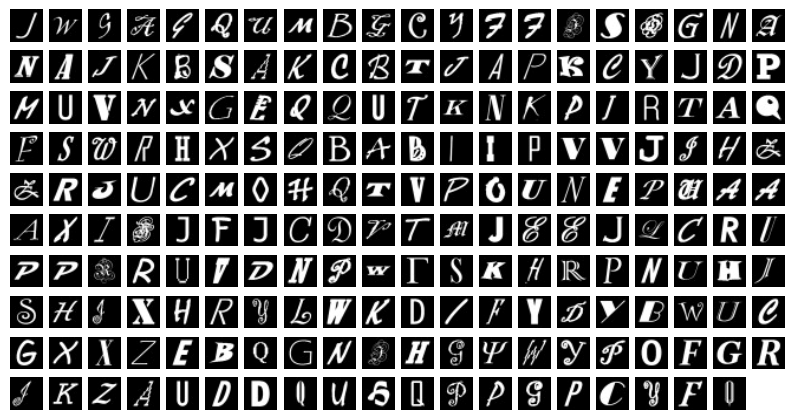

In [39]:
# Extrae las características (imágenes) correspondientes a las k muestras con mayor incertidumbre del conjunto de entrenamiento.
X_lowest = X_train_.values[sorted_ixs[:k]]

plt.figure(figsize=(10, 10))

for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 20, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

Estas son las k muestras (196 Imágenes) que tienen el mayor incentidumbre en el conjunto de entrenamiento, es decir que son las muestras con menor valor de probabilidad.

In [40]:
# Extracción de las Etiquetas de las Muestras con Mayor Incertidumbre
y_lowest = y_train.values[sorted_ixs[:k]]

# Mostramos las etiquetas de las muestras con mayor incertidumbre
print(y_lowest.shape)
print(y_lowest)

(199,)
[19 32 16 10 16 26 30 22 11 16 12 34 15 15 18 28 26 16 23 10 23 10 19 20
 11 28 10 20 12 11 29 19 10 25 20 12 34 19 13 25 22 30 31 23 33 16 14 26
 26 30 29 20 23 20 25 19 27 29 10 26 15 28 32 27 17 33 28 26 11 10 11 18
 18 25 31 31 19 19 17 35 35 27 19 30 12 22 24 17 26 29 31 25 24 30 23 14
 25 30 10 10 10 33 18 34 19 15 19 12 13 31 29 22 19 14 14 19 21 12 27 30
 25 25 27 27 30 31 13 23 25 32 16 28 20 17 27 25 23 30 17 19 28 17 19 33
 17 27 34 21 32 20 13 18 15 34 13 34 11 32 30 12 16 33 33 35 14 11 26 16
 23 19 17 16 34 32 34 25 24 15 16 27 19 20 35 10 30 13 13 26 30 17 26 25
 25 16 25 12 34 15 26]


El siguiente código realiza una actualización de las etiquetas en un conjunto de etiquetas propagadas (y_train_propagated) utilizando las etiquetas correspondientes a las muestras con mayor incertidumbre (y_lowest). A continuación, explicaré qué hace este código:

In [41]:
# Actualización de las Etiquetas de las Muestras con Mayor Incertidumbre
y_train2 = y_train_propagated.copy()

# y_train2: Es un arreglo de etiquetas actualizado, donde las etiquetas de las k muestras 
# con mayor incertidumbre en y_train_propagated han sido reemplazadas por las etiquetas correspondientes de y_lowest.
y_train2[sorted_ixs[:k]] = y_lowest

Esta línea reemplaza las etiquetas de las muestras más inciertas en y_train2 con las etiquetas correctas provenientes de y_lowest, lo que ayuda a mejorar la calidad de las etiquetas en el proceso de aprendizaje activo.

El código que actualiza las etiquetas en función de las muestras con mayor incertidumbre proporciona una manera eficaz de mejorar progresivamente el conjunto de etiquetas utilizado en el entrenamiento del modelo durante el aprendizaje activo, facilitando así la mejora iterativa del modelo de clasificación.

In [42]:
y_train2[:k]

array([12., 16., 18., 34., 28., 32., 26., 32., 30., 11., 16., 20., 12.,
       32., 13., 19., 22., 20., 30., 18., 22., 23., 16., 24., 15., 18.,
       16., 32., 24., 15., 24., 33., 19., 33., 17., 13., 14., 10., 14.,
       27., 18., 21., 33., 22., 23., 24., 25., 32., 32., 18., 23., 25.,
       33., 25., 30., 35., 17., 11., 33., 10., 24., 11., 18., 20., 15.,
       21., 22., 32., 20., 33., 32., 10., 25., 15., 15., 10., 24., 31.,
       25., 24., 16., 15., 29., 18., 22., 17., 21., 20., 35., 28., 15.,
       20., 30., 12., 14., 32., 32., 19., 19., 22., 22., 15., 16., 12.,
       18., 30., 32., 18., 18., 10., 16., 29., 32., 10., 26., 14., 29.,
       32., 22., 30., 18., 10., 16., 20., 22., 18., 33., 11., 23., 17.,
       29., 15., 26., 23., 24., 21., 11., 19., 18., 16., 15., 23., 24.,
       33., 30., 15., 15., 19., 24., 17., 26., 30., 29., 18., 18., 22.,
       35., 25., 14., 34., 15., 18., 19., 24., 32., 20., 30., 19., 15.,
       30., 29., 34., 12., 18., 25., 18., 23., 12., 24., 32., 22

In [43]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg5.fit(X_train_, y_train2)

# Calculamos la precisión del clasificador log_reg5 en el conjunto de prueba.
log_reg5.score(X_test_, y_test)

CPU times: total: 44.1 s
Wall time: 50.1 s


0.7248296744890235

El siguiente código crea un nuevo clasificador de regresión logística (log_reg5) y lo entrena utilizando las etiquetas actualizadas (y_train2) en un subconjunto de muestras del conjunto de entrenamiento. Luego evalúa el desempeño de este clasificador en el conjunto de prueba (X_test, y_test)

 El código que crea, entrena y evalúa el clasificador de regresión logística log_reg5 utilizando etiquetas actualizadas a través del aprendizaje activo permite mejorar y validar la efectividad del modelo en la tarea de clasificación. La precisión obtenida en el conjunto de prueba sirve como métrica de rendimiento para evaluar la calidad del modelo entrenado.